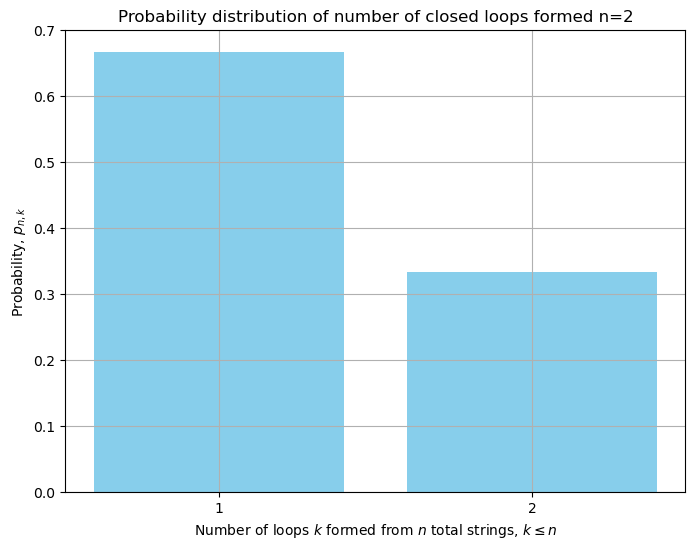

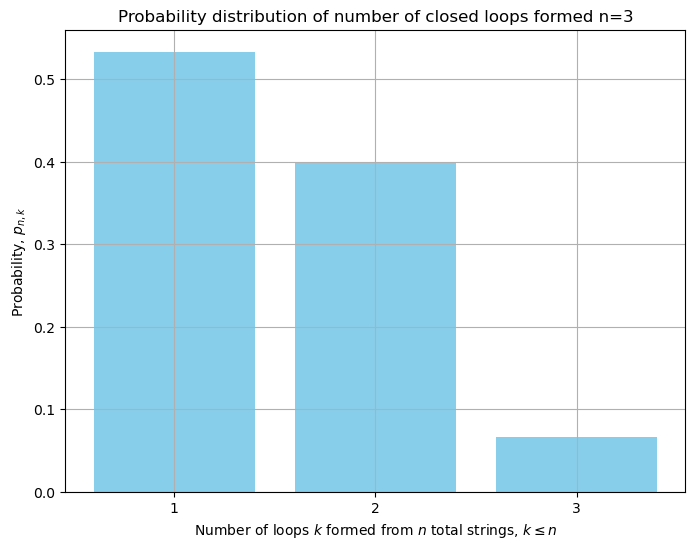

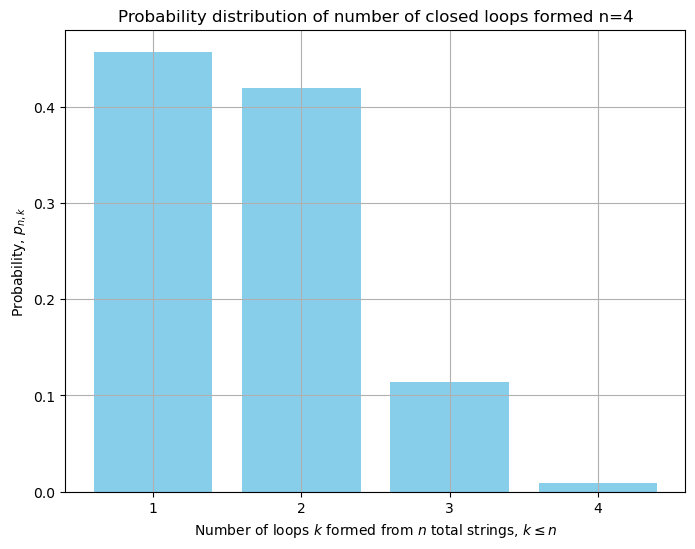

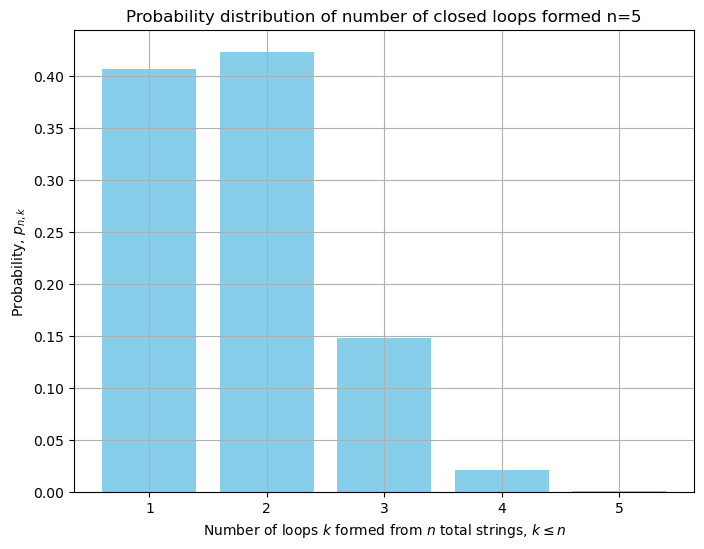

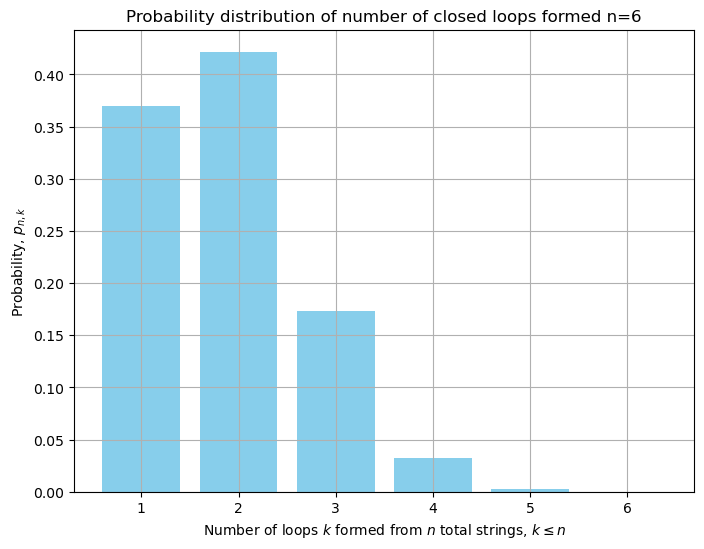

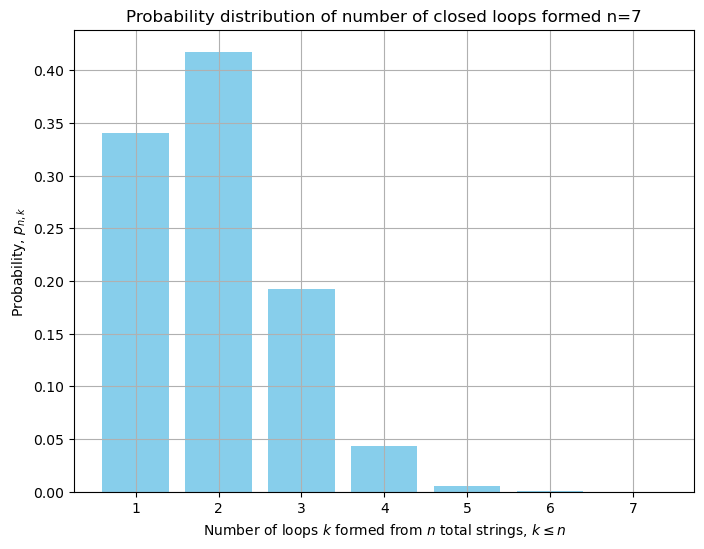

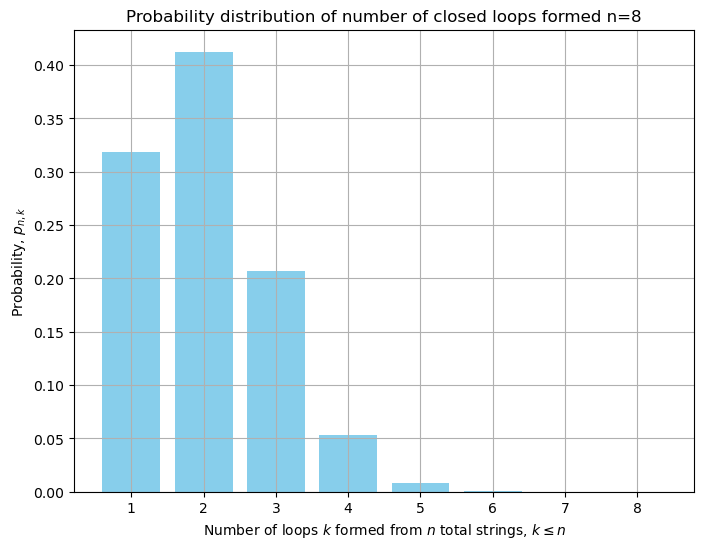

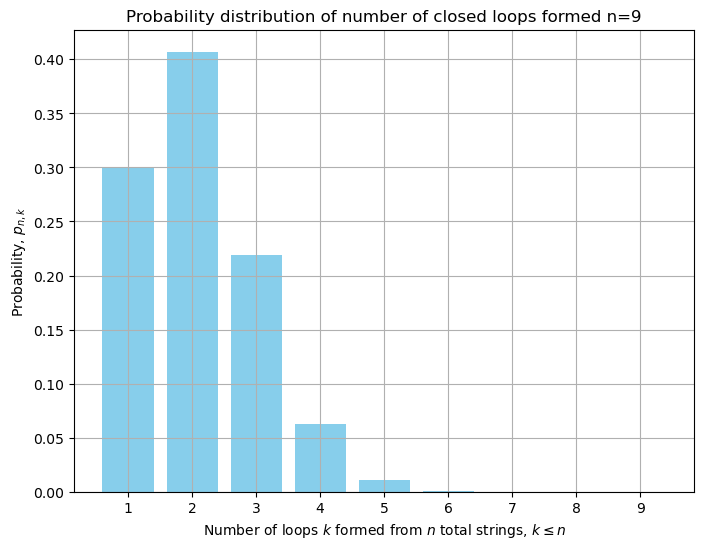

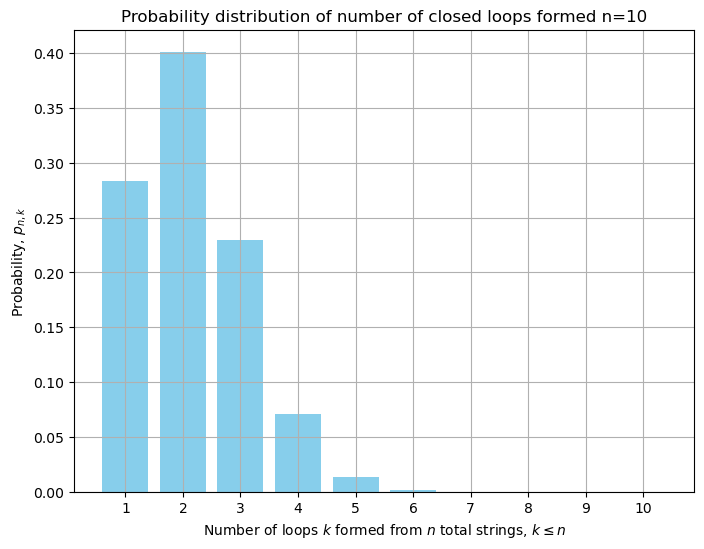

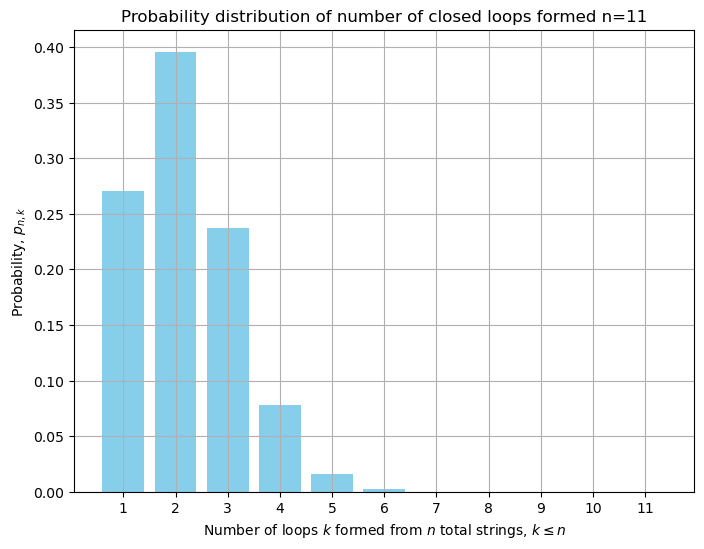

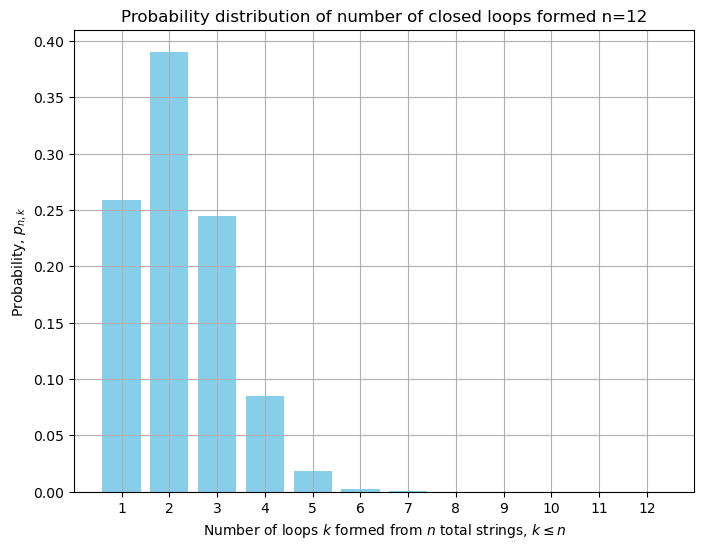

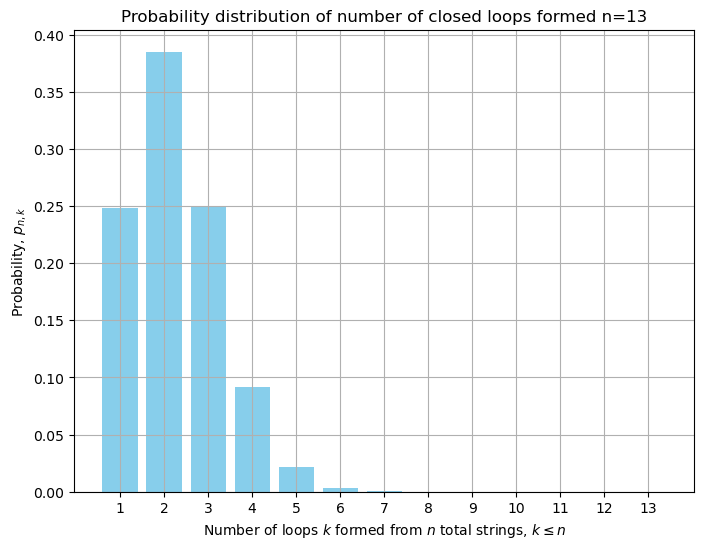

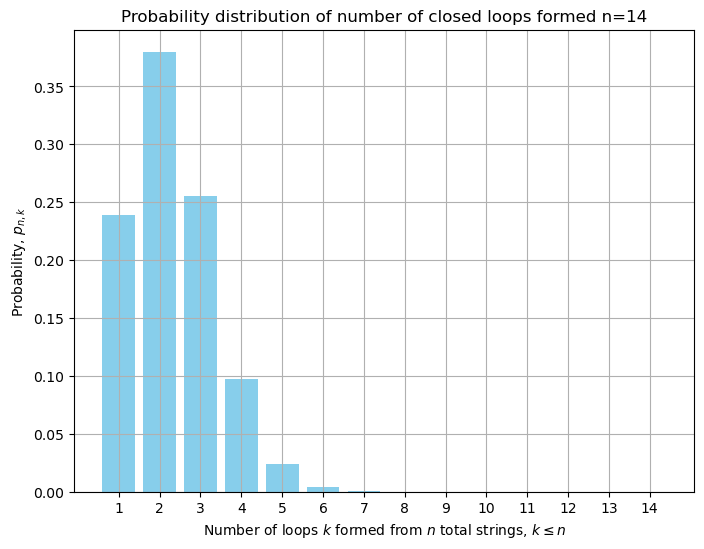

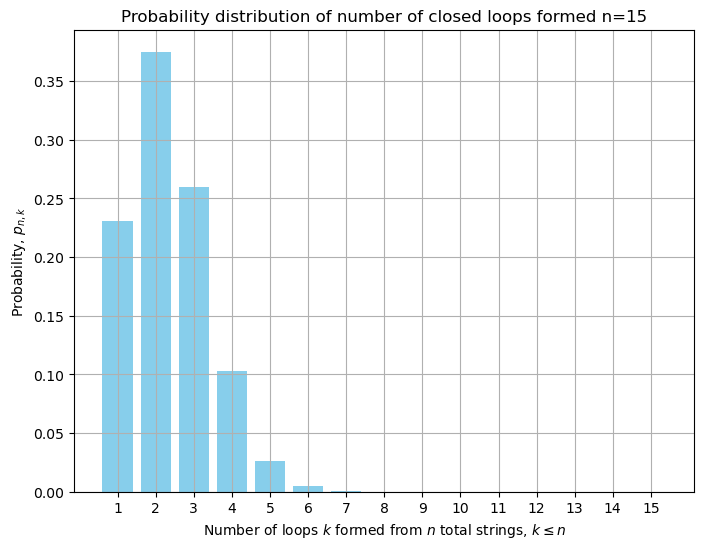

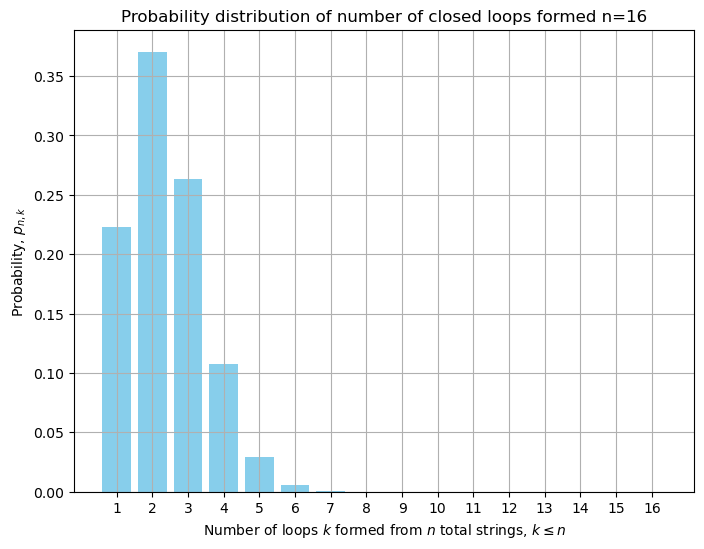

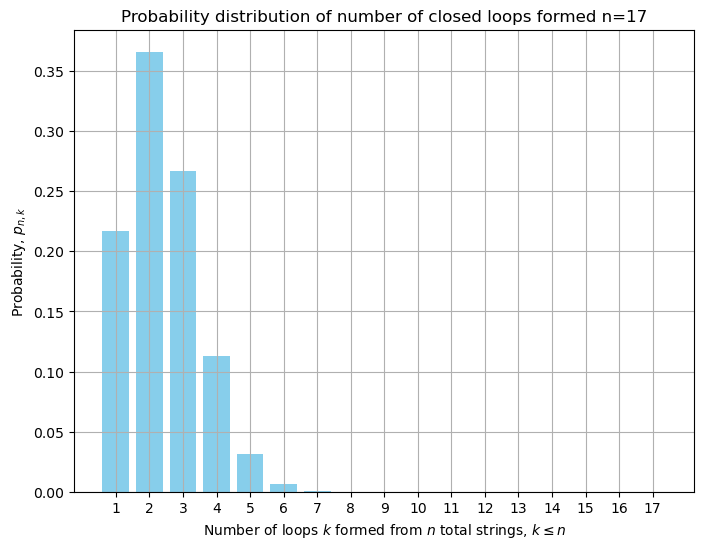

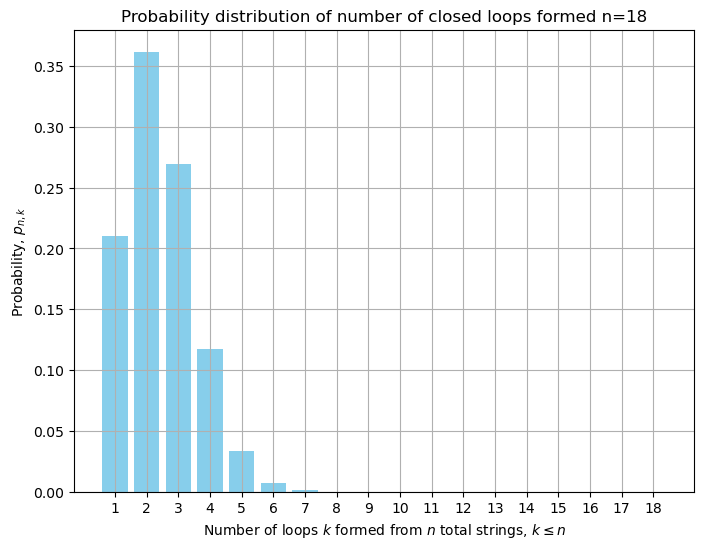

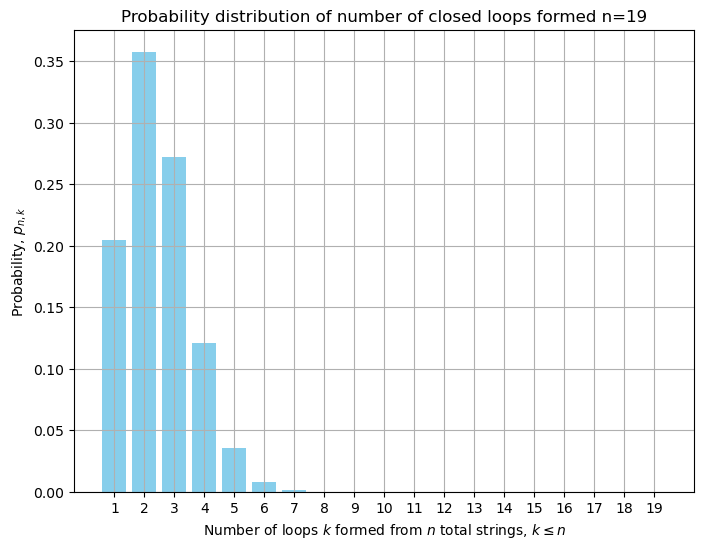

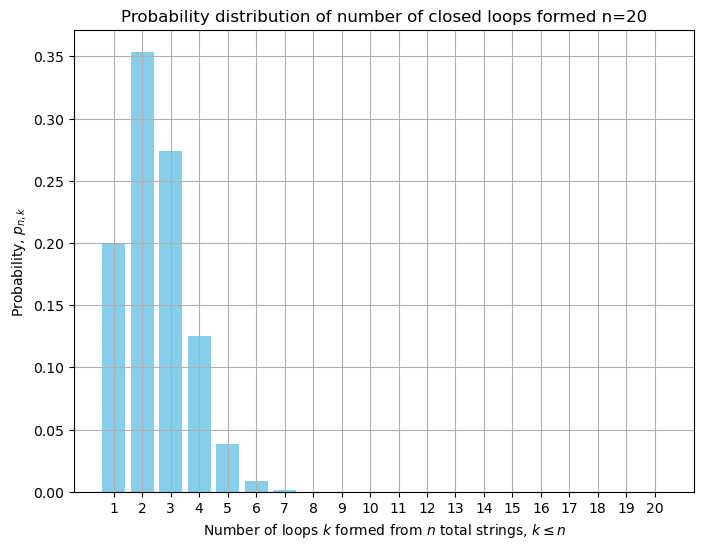

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

# Initialise with the n=2 case
df2 = {'l': [1, 2],
       'p': [2/3, 1/3]}

# Convert df2 to a dataframe
df2 = pd.DataFrame(df2)

# Dfs is a dictionary that stores df2
Dfs = {'n=2': df2}

#Calculate the probabilities for the n=m case from the n=m-1 case (nested behaviour), and store these values in the dataframes.
def calc_p(df_prev, l, n):
    if l == 1:
        return (2**(n-1) * math.factorial(n-1))**2/(math.factorial(2*n-1))
    elif l == n:
        return  (2**(n-1) * math.factorial(n-1)) / math.factorial(2*n-1)
    else:
        return ((2*n-2)/(2*n-1)) * df_prev.loc[df_prev['l'] == l, 'p'].iloc[0] + (1/(2*n-1)) * df_prev.loc[df_prev['l'] == l-1, 'p'].iloc[0]
def df(df0, n):
    dfn = {'l' : [], 'p' : []}
    for l in range(1, n+1):
        p=calc_p(df0, l, n)
        dfn['l'].append(l)
        dfn['p'].append(p)
    dfn=pd.DataFrame(dfn)
    return dfn
#Updates the dictionary
def dictofDfs(Dfs, n):
    for i in range(2, n):
        prev_df = Dfs['n={}'.format(i)]
        new_df = df(prev_df, i+1)
        Dfs['n={}'.format(i+1)] = new_df
    return Dfs
n = 20 
Dfs = dictofDfs(Dfs, n)


for key, value in Dfs.items():
    plt.figure(figsize=(8, 6))
    plt.bar(value['l'], value['p'], color='skyblue')
    plt.title(f'Probability distribution of number of closed loops formed {key}')
    plt.xlabel('Number of loops $k$ formed from $n$ total strings, $k \leq n$')
    plt.ylabel('Probability, $p_{n, k}$')
    plt.xticks(value['l'])
    plt.grid(True)

        

In [2]:
#Ensure the probability distributions are as we calculated by hand
df3=df(df2, 3)
df4=df(df3, 4)
print(df2)
print(df3)
print(df4)
df2probsum = df2['p'].sum()
df3probsum = df3['p'].sum()
df4probsum= df4['p'].sum()
print(df2probsum)
print(df3probsum)
print(df4probsum)

   l         p
0  1  0.666667
1  2  0.333333
   l         p
0  1  0.533333
1  2  0.400000
2  3  0.066667
   l         p
0  1  0.457143
1  2  0.419048
2  3  0.114286
3  4  0.009524
1.0
1.0
1.0


Fitted coefficients:
a: 0.5761748225354932
b: 0.7413569100321208


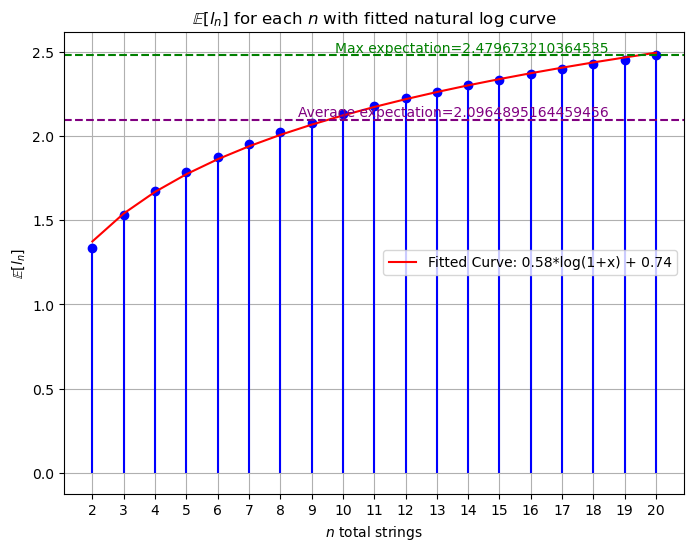

In [3]:
from scipy.optimize import curve_fit

# Calculating and plotting expected values
def calc_expected_val(dataframe):
    return sum(dataframe['l'] * dataframe['p'])

expected_vals = {}
for key, value in Dfs.items():
    expected_val = calc_expected_val(value)
    expected_vals[key] = expected_val

y_vals = list(expected_vals.values())

# Log function of the form ln(1+x) to be fitted
def log_curve(x, a, b):
    return a * np.log1p(x) + b

# Fit the curve to the expected values
popt, pcov = curve_fit(log_curve, np.arange(2, n+1), y_vals)

# Output the fitted coefficients
a, b = popt
print("Fitted coefficients:")
print("a:", a)
print("b:", b)

# Generate y values for the fitted curve
y_fit = log_curve(np.arange(2, n+1), a, b)

# Plot all relevant data
plt.figure(figsize=(8, 6))
plt.stem(np.arange(2, n+1), y_vals, linefmt='b-', markerfmt='bo', basefmt=' ')
plt.plot(np.arange(2, n+1), y_fit, color='r', label=f'Fitted Curve: {a:.2f}*log(1+x) + {b:.2f}')
plt.title('$\mathbb{E}[l_n]$ for each $n$ with fitted natural log curve')
plt.xlabel('$n$ total strings')
plt.ylabel('$\mathbb{E}[l_n]$')
plt.xticks(np.arange(2, n+1))
plt.grid(True)
plt.axhline(y=np.mean(list(expected_vals.values())), color='purple', linestyle='--')
plt.text(len(expected_vals) - 0.5, np.mean(list(expected_vals.values())), f'Average expectation={np.mean(list(expected_vals.values()))}', color='purple', verticalalignment='bottom', horizontalalignment='right')
plt.axhline(y=np.max(list(expected_vals.values())), color='green', linestyle='--')
plt.text(len(expected_vals) - 0.5, np.max(list(expected_vals.values())), f'Max expectation={np.max(list(expected_vals.values()))}', color='green', verticalalignment='bottom', horizontalalignment='right')
plt.legend()
plt.show()

        

In [4]:
print(np.arange(2, n+1))
print(expected_vals)

[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
{'n=2': 1.3333333333333333, 'n=3': 1.5333333333333334, 'n=4': 1.6761904761904762, 'n=5': 1.7873015873015872, 'n=6': 1.878210678210678, 'n=7': 1.9551337551337549, 'n=8': 2.021800421800422, 'n=9': 2.0806239512121865, 'n=10': 2.133255530159555, 'n=11': 2.1808745777786016, 'n=12': 2.2243528386481684, 'n=13': 2.264352838648168, 'n=14': 2.301389875685204, 'n=15': 2.3358726343058933, 'n=16': 2.3681306988220223, 'n=17': 2.398433729125054, 'n=18': 2.4270051576964815, 'n=19': 2.454032184723509, 'n=20': 2.479673210364535}


Fitted coefficients:
a: 0.5302707040019508
b: 0.8496600778804041


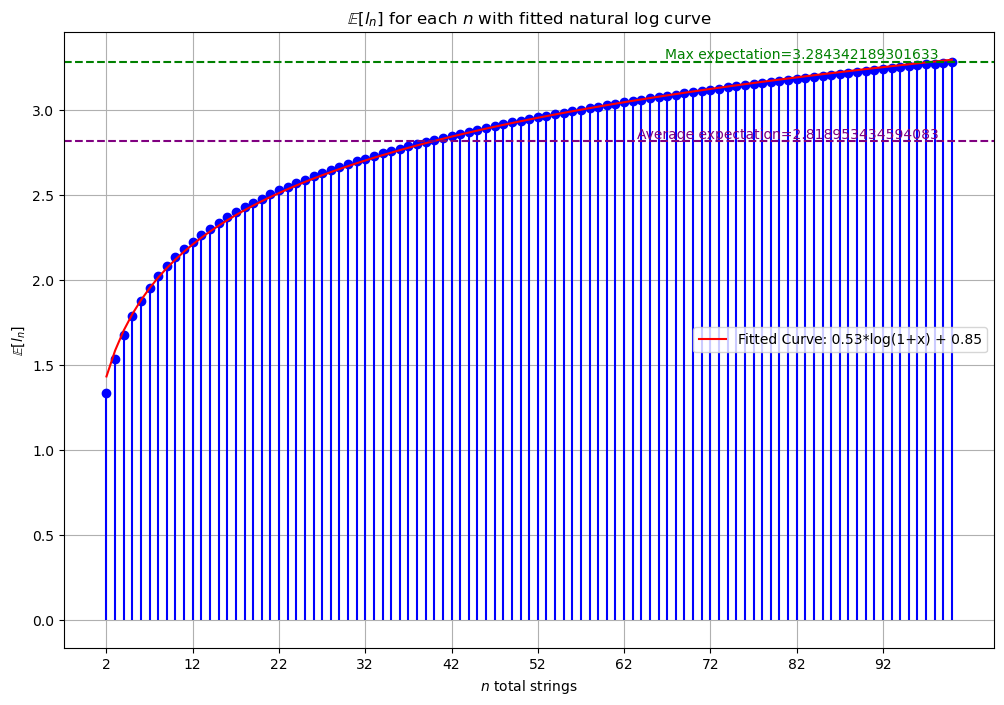

In [5]:
#Adjusting n=100
from scipy.optimize import curve_fit
n = 100
# Initialise with the n=2 case
df2 = {'l': [1, 2],
       'p': [2/3, 1/3]}

# Convert df2 to a dataframe
df2 = pd.DataFrame(df2)

# Dfs is a dictionary that stores df2
Dfs = {'n=2': df2}
Dfs = dictofDfs(Dfs, n)

# Calculating and plotting expected values
def calc_expected_val(dataframe):
    return sum(dataframe['l'] * dataframe['p'])

expected_vals = {}
for key, value in Dfs.items():
    expected_val = calc_expected_val(value)
    expected_vals[key] = expected_val

y_vals = list(expected_vals.values())

# Log function of the form ln(1+x) to be fitted
def log_curve(x, a, b):
    return a * np.log1p(x) + b

# Fit the curve to the expected values
popt, pcov = curve_fit(log_curve, np.arange(2, n+1), y_vals)

# Output the fitted coefficients
a, b = popt
print("Fitted coefficients:")
print("a:", a)
print("b:", b)

# Generate y values for the fitted curve
y_fit = log_curve(np.arange(2, n+1), a, b)

# Plot all relevant data
plt.figure(figsize=(12, 8))
plt.stem(np.arange(2, n+1), y_vals, linefmt='b-', markerfmt='bo', basefmt=' ')
plt.plot(np.arange(2, n+1), y_fit, color='r', label=f'Fitted Curve: {a:.2f}*log(1+x) + {b:.2f}')
plt.title('$\mathbb{E}[l_n]$ for each $n$ with fitted natural log curve')
plt.xlabel('$n$ total strings')
plt.ylabel('$\mathbb{E}[l_n]$')
plt.xticks(np.arange(2, n+1, 10))
plt.axhline(y=np.mean(list(expected_vals.values())), color='purple', linestyle='--')
plt.text(len(expected_vals) - 0.5, np.mean(list(expected_vals.values())), f'Average expectation={np.mean(list(expected_vals.values()))}', color='purple', verticalalignment='bottom', horizontalalignment='right')
plt.axhline(y=np.max(list(expected_vals.values())), color='green', linestyle='--')
plt.text(len(expected_vals) - 0.5, np.max(list(expected_vals.values())), f'Max expectation={np.max(list(expected_vals.values()))}', color='green', verticalalignment='bottom', horizontalalignment='right')
plt.grid('on')
plt.legend()
plt.show()

Fitted coefficients:
a: 0.5070636988732332
b: 0.9368100082813209


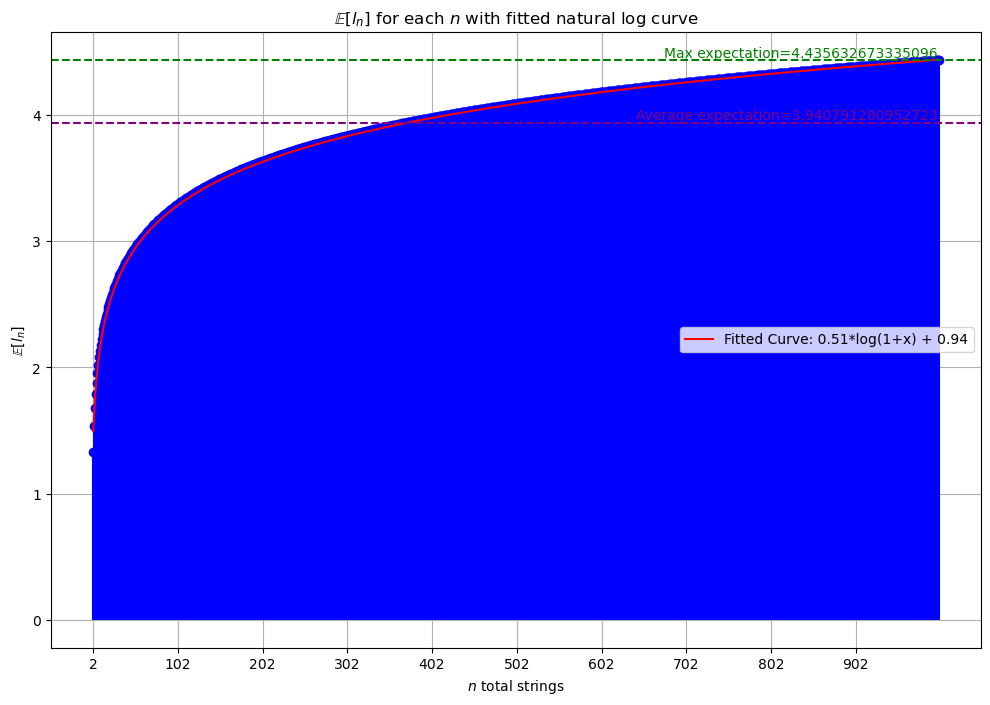

In [6]:
#Adjusting n=1000
from scipy.optimize import curve_fit
n = 1000
# Initialise with the n=2 case
df2 = {'l': [1, 2],
       'p': [2/3, 1/3]}

# Convert df2 to a dataframe
df2 = pd.DataFrame(df2)

# Dfs is a dictionary that stores df2
Dfs = {'n=2': df2}
Dfs = dictofDfs(Dfs, n)

# Calculating and plotting expected values
def calc_expected_val(dataframe):
    return sum(dataframe['l'] * dataframe['p'])

expected_vals = {}
for key, value in Dfs.items():
    expected_val = calc_expected_val(value)
    expected_vals[key] = expected_val

y_vals = list(expected_vals.values())

# Log function of the form ln(1+x) to be fitted
def log_curve(x, a, b):
    return a * np.log1p(x) + b

# Fit the curve to the expected values
popt, pcov = curve_fit(log_curve, np.arange(2, n+1), y_vals)

# Output the fitted coefficients
a, b = popt
print("Fitted coefficients:")
print("a:", a)
print("b:", b)

# Generate y values for the fitted curve
y_fit = log_curve(np.arange(2, n+1), a, b)

# Plot all relevant data
plt.figure(figsize=(12, 8))
plt.stem(np.arange(2, n+1), y_vals, linefmt='b-', markerfmt='bo', basefmt=' ')
plt.plot(np.arange(2, n+1), y_fit, color='r', label=f'Fitted Curve: {a:.2f}*log(1+x) + {b:.2f}')
plt.title('$\mathbb{E}[l_n]$ for each $n$ with fitted natural log curve')
plt.xlabel('$n$ total strings')
plt.ylabel('$\mathbb{E}[l_n]$')
plt.xticks(np.arange(2, n+1, 100))
plt.axhline(y=np.mean(list(expected_vals.values())), color='purple', linestyle='--')
plt.text(len(expected_vals) - 0.5, np.mean(list(expected_vals.values())), f'Average expectation={np.mean(list(expected_vals.values()))}', color='purple', verticalalignment='bottom', horizontalalignment='right')
plt.axhline(y=np.max(list(expected_vals.values())), color='green', linestyle='--')
plt.text(len(expected_vals) - 0.5, np.max(list(expected_vals.values())), f'Max expectation={np.max(list(expected_vals.values()))}', color='green', verticalalignment='bottom', horizontalalignment='right')
plt.grid('on')
plt.legend()
plt.show()